In [12]:
import pyodbc
server_name = '.'
database_name = 'AdventureWorks2022'
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server_name};DATABASE={database_name};Trusted_Connection=yes'
conn = pyodbc.connect(connection_string)
cursor = conn.cursor()
import pandas as pd

# Write the SQL query
sql_query = '''SELECT sales.vStoreWithDemographics.Name, 
    MAX(NumberEmployees) AS NumberOfEmployees, 
    MAX(SquareFeet) AS StoreSize, 
    ROUND(SUM(TotalDue),2) as Revenue, 
    MAX(2023 - YearOpened) as TradingDuration, 
    MAX(AnnualRevenue) as AnnualRevenue
FROM sales.vStoreWithDemographics
INNER JOIN sales.Customer ON sales.vStoreWithDemographics.BusinessEntityID = sales.Customer.StoreID
INNER JOIN sales.SalesOrderHeader ON sales.Customer.CustomerID = sales.SalesOrderHeader.CustomerID
GROUP BY Name
ORDER BY sales.vStoreWithDemographics.Name;'''

StoreData = pd.read_sql_query(sql_query, conn)


                           Name  NumberOfEmployees  StoreSize    Revenue  \
0                  A Bike Store                  2       7000   95924.02   
1       A Great Bicycle Company                 28      28000   10196.20   
2           A Typical Bike Shop                  8       8000   93981.02   
3    Acceptable Sales & Service                 12      21000    1416.93   
4           Accessories Network                 16      22000    2450.48   
..                          ...                ...        ...        ...   
628   World Bike Discount Store                 38      39000    5537.26   
629              World of Bikes                 17      19000  313671.54   
630   Worthwhile Activity Store                  7       8000  147107.03   
631           Year-Round Sports                 66      75000  167452.60   
632      Yellow Bicycle Company                 29      26000   87227.32   

     TradingDuration  AnnualRevenue  
0                 53        30000.0  
1          

C:\Users\jerom\AppData\Local\Temp\ipykernel_17980\2019833913.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  StoreData = pd.read_sql_query(sql_query, conn)


In [13]:
print(StoreData.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               633 non-null    object 
 1   NumberOfEmployees  633 non-null    int64  
 2   StoreSize          633 non-null    int64  
 3   Revenue            633 non-null    float64
 4   TradingDuration    633 non-null    int64  
 5   AnnualRevenue      633 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 29.8+ KB
None


[[1.         0.10309726]
 [0.10309726 1.        ]]


C:\Users\jerom\AppData\Local\Temp\ipykernel_17980\282668193.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(StoreData.corr())


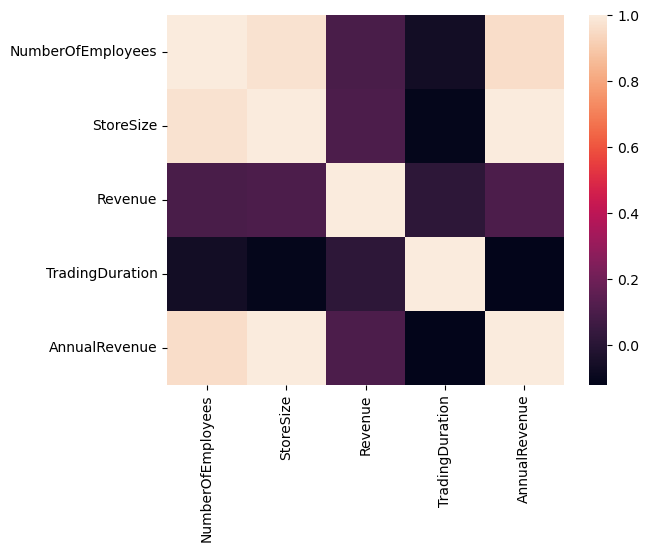

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

r = np.corrcoef(StoreData['Revenue'], StoreData['StoreSize'] )
print(r)

sns.heatmap(StoreData.corr())
plt.show()